In [3]:
pip install -q scikit-learn pandas numpy matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
df = pd.read_csv('DATASET_state_weather_aqi_data_PPNC (1).csv')

In [10]:
df['Date'] = pd.to_datetime(df['Date (L )'], format="%m/%d/%Y %H:%M")
df = df.sort_values('Date')

features = ['PM2.5', 'PM10', 'NH3', 'SO2', 'CO', 'OZONE', 'AQI']
df_model = df[['Date', 'NO2'] + features].copy()

df_model['NO2_1day_future'] = df_model['NO2'].shift(-24)
df_model['NO2_7day_future'] = df_model['NO2'].shift(-168)

df_model_cleaned = df_model.dropna().reset_index(drop=True)

In [13]:
# Tạo cột dự đoán tương lai cho NH3
df_model_cleaned['NH3_1day_future'] = df_model_cleaned['NH3'].shift(-1)
df_model_cleaned['NH3_7day_future'] = df_model_cleaned['NH3'].shift(-7)

# Loại bỏ các dòng chứa NaN do shift tạo ra
df_model_cleaned = df_model_cleaned.dropna(subset=['NH3_1day_future', 'NH3_7day_future'])

# Biến đầu vào X giữ nguyên
X = df_model_cleaned[features]

# Biến mục tiêu cho NH3
y_nh3_1day = df_model_cleaned['NH3_1day_future']
y_nh3_7day = df_model_cleaned['NH3_7day_future']

# Tách dữ liệu train/test
X_train_nh3_1, X_test_nh3_1, y_train_nh3_1, y_test_nh3_1 = train_test_split(X, y_nh3_1day, test_size=0.2, random_state=42)
X_train_nh3_7, X_test_nh3_7, y_train_nh3_7, y_test_nh3_7 = train_test_split(X, y_nh3_7day, test_size=0.2, random_state=42)

# Khởi tạo mô hình Decision Tree cho NH3
model_nh3_1day = DecisionTreeRegressor(random_state=42)
model_nh3_7day = DecisionTreeRegressor(random_state=42)

# Huấn luyện mô hình
model_nh3_1day.fit(X_train_nh3_1, y_train_nh3_1)
model_nh3_7day.fit(X_train_nh3_7, y_train_nh3_7)


DecisionTreeRegressor(random_state=42)

Kết quả dự đoán NH₃ sau 1 ngày:
MSE: 40.529411764705884
R²: -0.1853463542984366


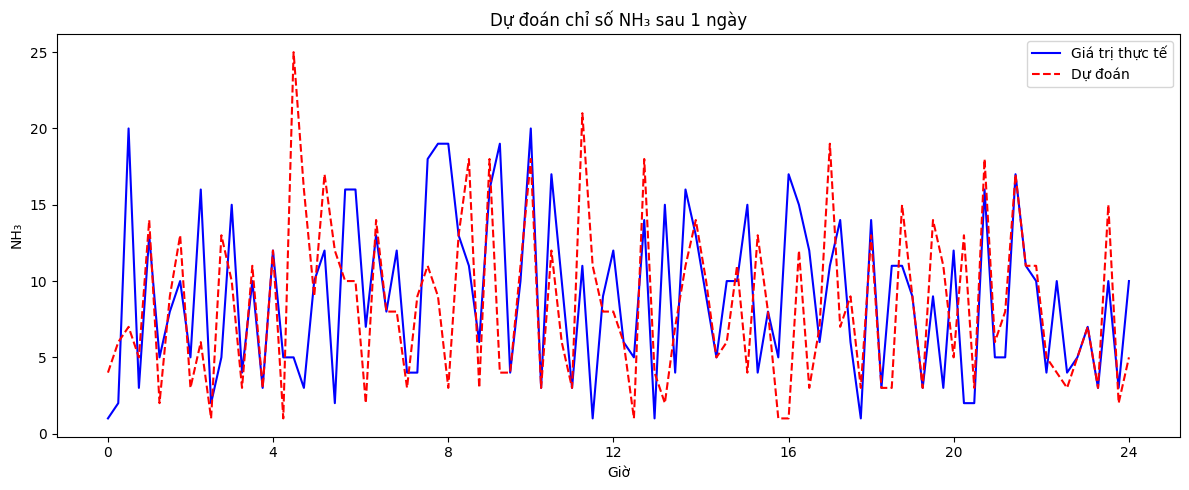


Kết quả dự đoán NH₃ sau 7 ngày:
MSE: 66.56617647058823
R²: -0.8353557096603004


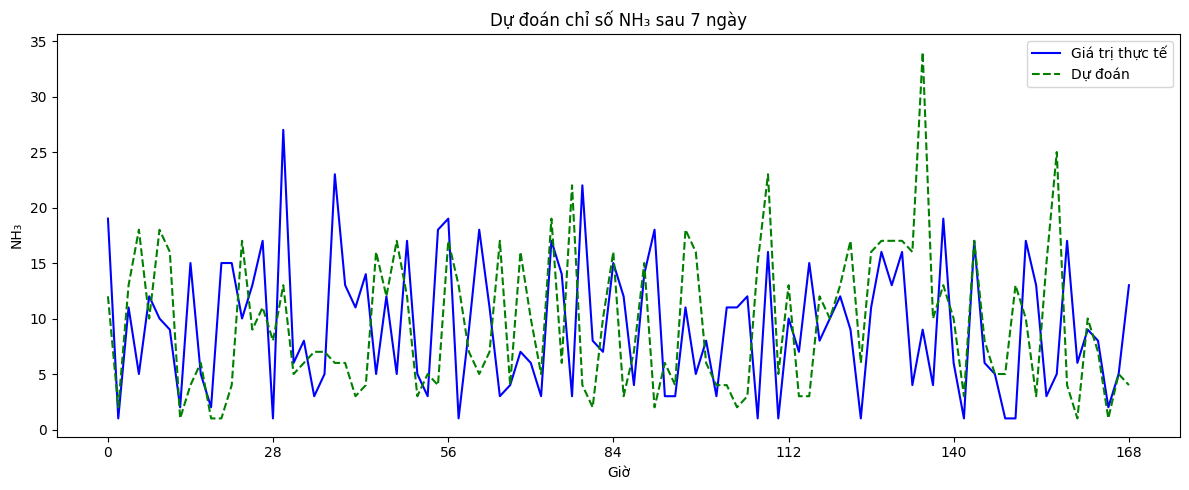

In [14]:
# Dự đoán NH3
y_pred_nh3_1 = model_nh3_1day.predict(X_test_nh3_1)
y_pred_nh3_7 = model_nh3_7day.predict(X_test_nh3_7)

# Tính toán MSE và R²
mse_nh3_1 = mean_squared_error(y_test_nh3_1, y_pred_nh3_1)
r2_nh3_1 = r2_score(y_test_nh3_1, y_pred_nh3_1)

mse_nh3_7 = mean_squared_error(y_test_nh3_7, y_pred_nh3_7)
r2_nh3_7 = r2_score(y_test_nh3_7, y_pred_nh3_7)

# Kết quả sau 1 ngày
print("Kết quả dự đoán NH₃ sau 1 ngày:")
print("MSE:", mse_nh3_1)
print("R²:", r2_nh3_1)

# Biểu đồ NH3 sau 1 ngày
plt.figure(figsize=(12, 5))
plt.plot(y_test_nh3_1.values[:100], label='Giá trị thực tế', color='blue')
plt.plot(y_pred_nh3_1[:100], label='Dự đoán', color='red', linestyle='--')
plt.title('Dự đoán chỉ số NH₃ sau 1 ngày')
plt.xlabel('Giờ')
plt.ylabel('NH₃')
plt.xticks(ticks=np.linspace(0, 99, 7).astype(int), labels=np.linspace(0, 24, 7).astype(int))
plt.legend()
plt.tight_layout()
plt.show()

# Kết quả sau 7 ngày
print("\nKết quả dự đoán NH₃ sau 7 ngày:")
print("MSE:", mse_nh3_7)
print("R²:", r2_nh3_7)

# Biểu đồ NH3 sau 7 ngày
plt.figure(figsize=(12, 5))
plt.plot(y_test_nh3_7.values[:100], label='Giá trị thực tế', color='blue')
plt.plot(y_pred_nh3_7[:100], label='Dự đoán', color='green', linestyle='--')
plt.title('Dự đoán chỉ số NH₃ sau 7 ngày')
plt.xlabel('Giờ')
plt.ylabel('NH₃')
plt.xticks(ticks=np.linspace(0, 99, 7).astype(int), labels=np.linspace(0, 168, 7).astype(int))
plt.legend()
plt.tight_layout()
plt.show()
